# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import datetime as dt
import matplotlib.ticker as mtick

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MaxNLocator

In [2]:
plot_output_dir = "\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Output Plots"
data_output_dir = "\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Output Data"

In [3]:
excel_path = "\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Manual\\input-data.xlsx"
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

##Users\Advait Lath\Documents\nimf-tracker-main\Manual

Files in 'c:\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Manual': ['.DS_Store', 'COW', 'input-data.xlsx', 'input-data1.xlsx', 'manual.ipynb', 'snapshot_graphs.xlsx']


# GST and eWay

In [4]:
gst = pd.read_excel(excel_path, sheet_name='gst-eway', index_col=0, parse_dates=True)

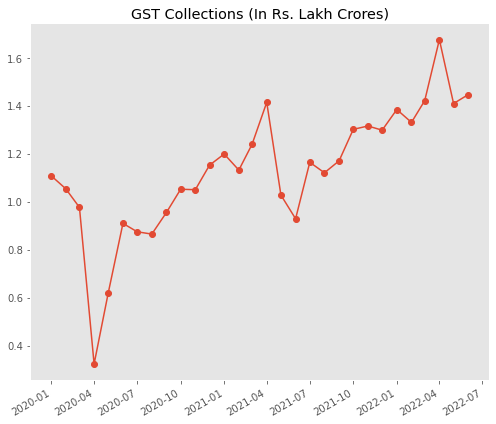

In [5]:
(gst['GST']/1000000).plot(marker='o', figsize=(7,6), x_compat=True)

plt.title("GST Collections (In Rs. Lakh Crores)")

#plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("")
plt.tight_layout()
plt.grid(visible=False)

plt.savefig(plot_output_dir+"\\gst.png", dpi=300)


In [6]:
gst = gst/1000000

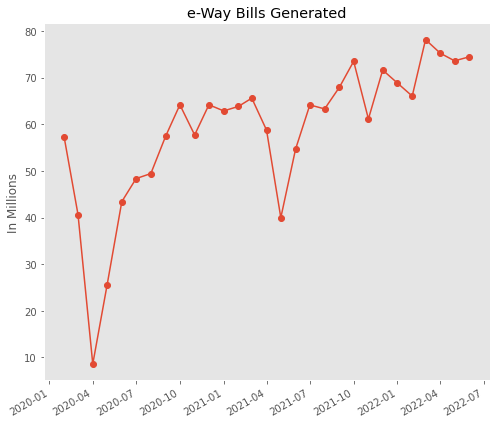

In [7]:
gst[gst.columns[0]].plot(kind='line', marker='o', figsize=(7,6), x_compat=True)
plt.title('e-Way Bills Generated', color='black')
plt.ylabel('In Millions')
# plt.xlabel('Data as on 6 Sep, 2020')
plt.grid(visible=False)
plt.tight_layout()

plt.savefig(plot_output_dir+'\\e-way bills', dpi=150, bbox_inches='tight')


In [8]:
gst.to_csv(data_output_dir+"\\gst_eway.csv")

# Truck

In [9]:
truck = pd.read_excel(excel_path, sheet_name="truck",index_col=0, parse_dates=True)

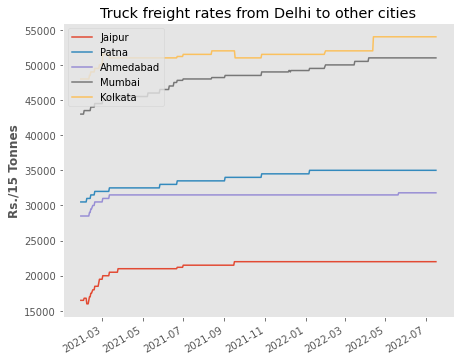

In [10]:
truck['Jaipur'].plot(label='Jaipur')
truck['Patna '].plot(label='Patna')
truck['Ahmedabad '].plot(label='Ahmedabad')
truck['Mumbai '].plot(label='Mumbai')
# truck['Chennai '].plot(label='Chennai')
truck['Kolkata '].plot(label='Kolkata', figsize=(7,6))
plt.legend(loc='upper left')
plt.grid(visible=False)
plt.title('Truck freight rates from Delhi to other cities')
plt.xlabel('')
plt.ylabel('Rs./15 Tonnes', fontweight= 'bold')

plt.savefig(plot_output_dir+'\\truck.png', dpi=300, bbox_inches='tight')



# Energy Consumption

In [11]:
elec = pd.read_excel(excel_path, sheet_name="electricity",index_col=0, parse_dates=True)

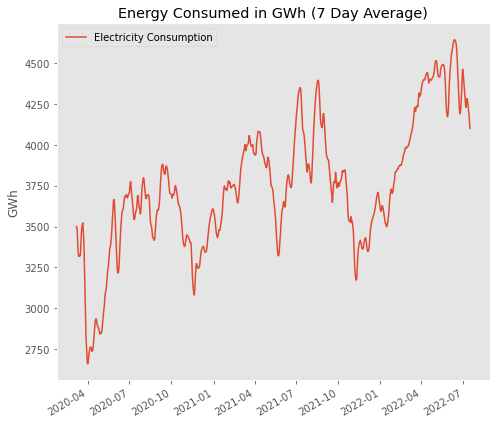

In [12]:
elec['2020-03-01':].rolling(7).mean().plot(figsize=(7,6), x_compat=True)

plt.xlabel('')
plt.ylabel('GWh')
# plt.grid(b=True, linewidth=0.4)
plt.title('Energy Consumed in GWh (7 Day Average)')
plt.legend()
plt.grid(visible=False)
plt.tight_layout()

plt.savefig(plot_output_dir+'\\elec.png', dpi=300)


# UPI

In [13]:
upi = pd.read_excel(excel_path, sheet_name="upi",index_col=0, parse_dates=True)

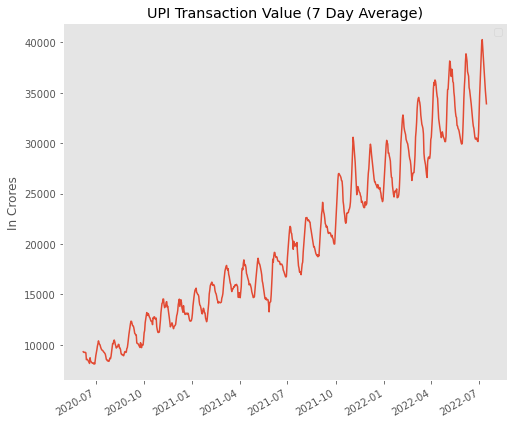

In [14]:
upi.rolling(7).mean().plot(figsize=(7,6), x_compat=True)

plt.title("UPI Transaction Value (7 Day Average)")
plt.legend("")
plt.xlabel("")

plt.tight_layout()

plt.ylabel('In Crores')

plt.grid(visible=False)

plt.savefig(plot_output_dir+'\\upi_val.png', dpi=150, bbox_inches='tight')


# Unemployment


## Daily

In [15]:
unemp_daily = pd.read_excel(excel_path, sheet_name="unemp-daily",index_col=0, parse_dates=True)

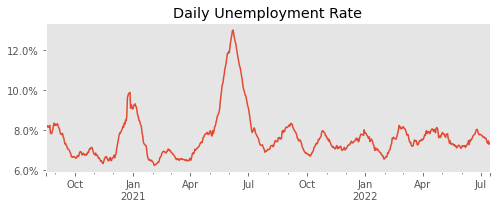

In [16]:
# ax=unemp_daily.plot(secondary_y='Labour   participation rate  (LPR) ')

ax = unemp_daily['UER'].plot(figsize=(7,3), kind='line')

plt.xlabel("")
plt.title('Daily Unemployment Rate')

plt.grid(visible=False)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()

plt.savefig(plot_output_dir+'\\unemp.png', dpi=300, bbox_inches='tight')


## Weekly

In [17]:
unemp_weekly = pd.read_excel(excel_path, sheet_name="unemp-weekly",index_col=0, parse_dates=True)

In [18]:
unemp_weekly = unemp_weekly['2020-11-26':].loc[:,['All India', 'LFPR']]

C:\Users\ADVAIT~1\AppData\Local\Temp/ipykernel_4580/2232539766.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  unemp_weekly = unemp_weekly['2020-11-26':].loc[:,['All India', 'LFPR']]


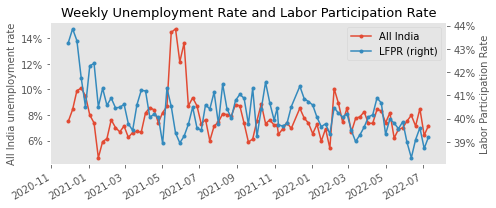

In [19]:
ax = unemp_weekly.plot(figsize=(7,3), x_compat=True, secondary_y=['LFPR'], marker='.')

ax.set_xlabel("")
plt.title('Weekly Unemployment Rate and Labor Participation Rate', fontsize=13)

plt.grid(visible=False)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.right_ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax.set_ylabel("All India unemployment rate", fontsize=10)
ax.right_ax.set_ylabel("Labor Participation Rate", fontsize=10)

plt.tight_layout()
plt.savefig(plot_output_dir+'\\weekly_unemp.png', dpi=300, bbox_inches='tight')


In [20]:
unemp_weekly.tail()

,All India,LFPR
Date,,
2022-06-12,7.98,38.31
2022-06-19,7.14,39.09
2022-06-26,8.49,39.60
2022-07-03,6.41,38.71
2022-07-10,7.17,39.20


# OAG Flight

## 2019

In [21]:
oag2019 = pd.read_excel(excel_path, sheet_name='oag_2019', index_col=0, parse_dates=True)

In [22]:
oag2019 = oag2019*100

In [23]:
oag2019.iloc[4]

Domestic         16.2
International   -15.3
Total             7.5
Name: South Asia, dtype: float64

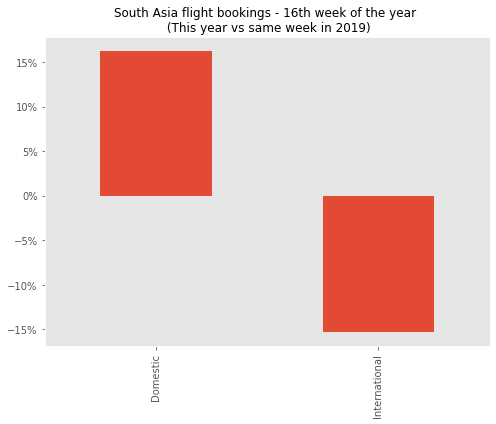

In [24]:
ax = oag2019.iloc[4,[0,1]].plot(kind='bar', figsize=(7,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

# plt.title("South Asia flight bookings - this week vs same week in 2019")
plt.title("South Asia flight bookings - 16th week of the year \n (This year vs same week in 2019)", fontsize=12)

plt.grid(False)

plt.tight_layout()

plt.savefig(plot_output_dir+'\\oag_2019.png', dpi=300, bbox_inches='tight')

## Flight Footfall (CEIC)

In [21]:
foot_fall = pd.read_excel(excel_path, sheet_name='footfall', index_col=0, parse_dates=True)

In [22]:
foot_fall= foot_fall
foot_fall_7d= foot_fall.rolling(7).mean().dropna()
foot_fall_7d.tail()

,Daily Passenger Footfall
Date,
2022-07-11,656380.000000
2022-07-12,651524.000000
2022-07-13,643903.714286
2022-07-14,637134.428571
2022-07-15,636754.142857


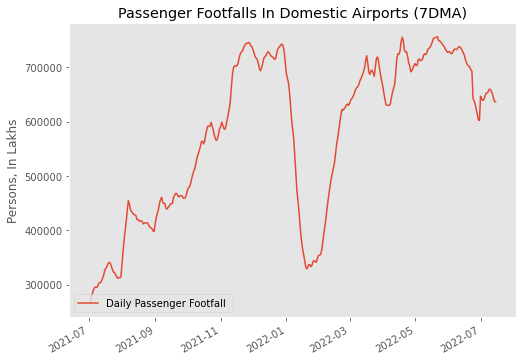

In [23]:
foot_fall_7d.plot(figsize=(8,6), x_compat=True)


plt.xlabel('')
plt.ylabel('Persons, In Lakhs')
# plt.ylabel('YoY Change in %')
plt.title('Passenger Footfalls In Domestic Airports (7DMA)')
plt.grid(visible=False)
# plt.show()
plt.legend(loc='lower left')
plt.savefig(plot_output_dir+'\\DailyFootfalls.png', dpi=500, bbox_inches='tight')

# Flight Movements (CEIC)(INT'L and DOMESTIC)

In [24]:
flight_mvmt = pd.read_excel(excel_path, sheet_name='flightmovements', index_col=0, parse_dates=True)

In [25]:
flight_mvmt_7d= flight_mvmt.rolling(7).mean().dropna()
#flight_mvmt_7d_df = pd.DataFrame([['Domestic Flight Movements', 'International Flight Movements']], columns=['Domestic Flight Movements','International Flight Movements'])
flight_mvmt_7d.tail()

,Domestic Flight Movements,International Flight Movements
Date,,
2022-07-11,5186.857143,865.285714
2022-07-12,5169.571429,863.857143
2022-07-13,5158.000000,863.000000
2022-07-14,5142.142857,858.000000
2022-07-15,5135.142857,857.285714


In [27]:
# ax = flight_mvmt_7d_df['Domestic Flight Movements','International Flight Movements'].plot(figsize=(8,6), x_compat=True, secondary_y=True)
# #ax2= flight_mvmt_7d['Domestic Flight Movements'].plot(figsize=(8,6), x_compat=True)

# ax2 = ax.twinx()
# ax.plot(color = 'g')
# ax2.plot(color = 'b')

# plt.xlabel('Movements= Arrival Flights+ Departure Flights', labelpad=10)


# ax.set_ylabel('Domestic Flights')
# ax2.set_ylabel('International Flights')
# # plt.ylabel('YoY Change in %')
# plt.title('Flight Movements, India (7DMA)')
# plt.grid(visible=False)
# # plt.show()
# plt.legend(loc='right')
# plt.savefig(plot_output_dir+'\\flightmovements.png', dpi=500, bbox_inches='tight')

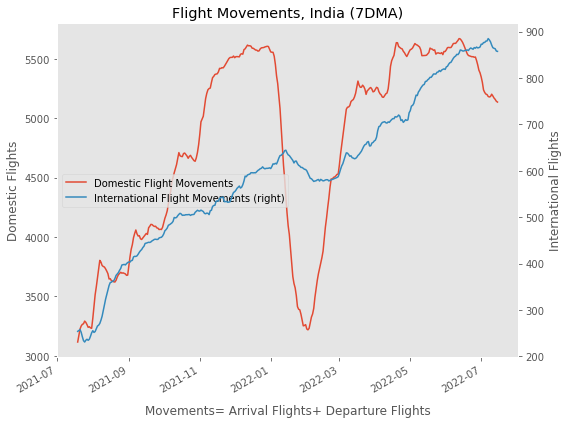

In [26]:
ax=flight_mvmt_7d.plot(kind='line', y='Domestic Flight Movements', figsize=(8,6), x_compat=True)

ax2=flight_mvmt_7d.plot(kind='line', y='International Flight Movements', secondary_y=True, ax=ax, x_compat=True)

ax.set_ylabel('Domestic Flights')
ax2.set_ylabel('International Flights')
ax.set_xlabel('Movements= Arrival Flights+ Departure Flights', labelpad=10)
plt.title('Flight Movements, India (7DMA)')

plt.grid(visible=False)
#plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig(plot_output_dir+'\\flightmovements.png', dpi=500, bbox_inches='tight')

plt.show()

# MONSOON KHARIF


In [27]:
kharif = pd.read_excel(excel_path, sheet_name="Kharif",index_col=0, parse_dates=True, header=1)

In [28]:
kharif

,2018,2019,2020,2021,2022
Crops,,,,,
Agricultural products,-0.1199,-0.0629,0.2121,-0.1454,0.0014
Pulses,-0.2605,-0.1660,0.3024,-0.1701,0.0895
Oilseeds,-0.0382,-0.0746,0.3566,-0.1642,0.0738
Cotton,-0.1472,0.2433,0.1728,-0.1453,0.0644
Jute & Mesta,0.0196,-0.0495,0.0085,0.0041,-0.0048
Sugar cane,0.0467,-0.0234,0.0394,0.0166,-0.0072


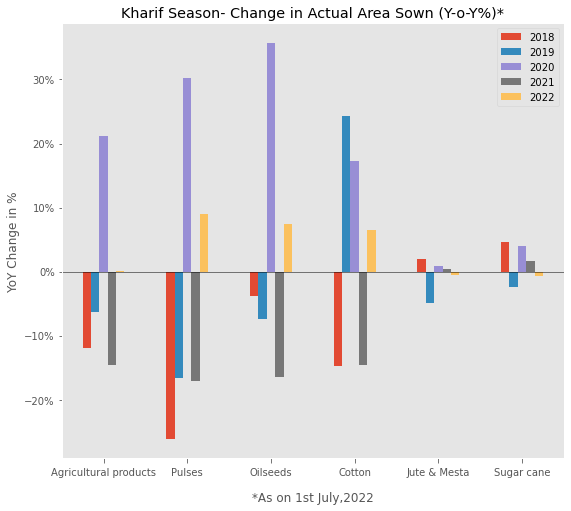

In [30]:

ax= kharif.plot(kind="bar", figsize=(9, 8))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.xlabel('*As on 1st July,2022', labelpad=14)
plt.ylabel('YoY Change in %')
plt.title('Kharif Season- Change in Actual Area Sown (Y-o-Y%)*')
ax.tick_params(axis="x", labelrotation=0,size=5)
plt.grid(visible=False)
plt.axhline(y=0, color='black', linestyle='-',lw=.5)
# plt.show()
plt.legend(loc='upper right')
plt.savefig(plot_output_dir+'\\Kharif actual area sown.png', dpi=300, bbox_inches='tight')

# Consumer Sentiment

In [32]:
sent = pd.read_excel(excel_path, sheet_name="sentiment",index_col=0, parse_dates=True, header=1)

In [33]:
sent.rename(columns={"Consumer Sentiment Indices (CMIE-Umich)": "Date"}, inplace=True)
sent.columns = (['Index of Consumer Sentiments-All India ', 'Index of Consumer Sentiments-Urban ',
       'Index of Consumer Sentiments-Rural ', 'Index of Consumer Expectations-All India ',
       'Index of Consumer Expectations-Urban ', 'Index of Consumer Expectations-Rural ',
       'Index of Current Economic Conditions-All India ',
       'Index of Current Economic Conditions-Urban ',
       'Index of Current Economic Conditions-Rural '])

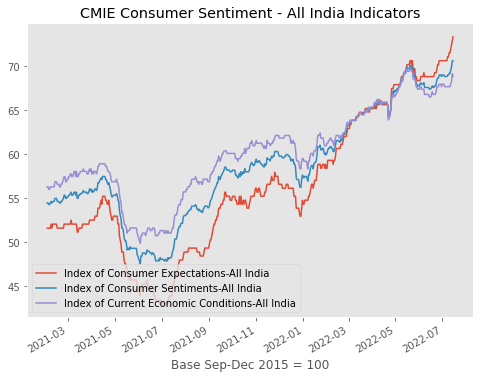

In [34]:
#All India plots
sent['Index of Consumer Expectations-All India '].plot(label='Index of Consumer Expectations-All India ')
sent['Index of Consumer Sentiments-All India '].plot(label='Index of Consumer Sentiments-All India')
sent['Index of Current Economic Conditions-All India '].plot(label='Index of Current Economic Conditions-All India', figsize=(8,6))

plt.xlabel('Base Sep-Dec 2015 = 100')
# plt.ylabel('YoY Change in %')
plt.title('CMIE Consumer Sentiment - All India Indicators')
plt.grid(visible=False)
# plt.show()
plt.legend(loc='lower left')
plt.savefig(plot_output_dir+'\\All India Indicators.png', dpi=200, bbox_inches='tight')



In [35]:
sent.tail()

,Index of Consumer Sentiments-All India,Index of Consumer Sentiments-Urban,Index of Consumer Sentiments-Rural,Index of Consumer Expectations-All India,Index of Consumer Expectations-Urban,Index of Consumer Expectations-Rural,Index of Current Economic Conditions-All India,Index of Current Economic Conditions-Urban,Index of Current Economic Conditions-Rural
,,,,,,,,,
2022-07-11,69.15,66.67,70.44,71.49,67.36,73.71,67.64,66.20,68.36
2022-07-12,69.50,67.17,70.26,71.95,67.78,73.71,67.93,66.76,68.06
2022-07-13,69.86,67.83,70.99,72.40,68.20,74.18,68.22,67.59,68.96
2022-07-14,70.57,68.00,71.53,72.85,68.20,75.12,69.10,67.87,69.25
2022-07-15,70.57,68.50,71.53,73.30,69.04,75.12,68.80,68.14,69.25


# PMI

In [36]:
pmi = pd.read_excel(excel_path, sheet_name="pmi",index_col=0, parse_dates=True)

In [37]:
pmi

,IHS Markit India manufacturing PMI,IHS Markit India services PMI,IHS Markit India composite PMI
Month,,,
2015-10-01,50.7,53.2,NaN
2015-11-01,50.3,50.1,NaN
2015-12-01,49.1,53.6,NaN
2016-01-01,51.1,54.3,NaN
2016-02-01,51.1,51.4,NaN
...,...,...,...
2022-02-01,54.9,51.8,53.5
2022-03-01,54.0,53.6,54.3
2022-04-01,54.7,57.9,57.6


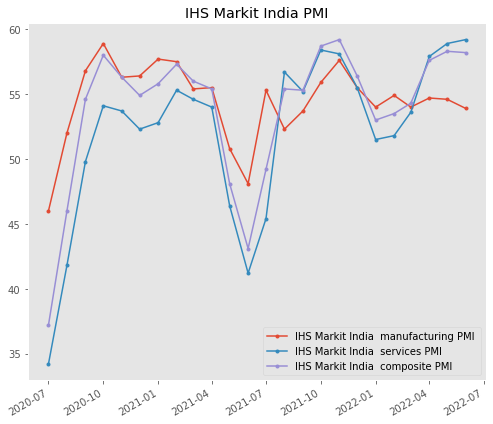

In [38]:
pmi.iloc[57:].plot(marker='.', figsize=(7,6), x_compat=True)
plt.xlabel("")
plt.title('IHS Markit India PMI')
plt.tight_layout()
plt.grid(visible=False)

plt.savefig(plot_output_dir+'\\pmi.png', dpi=150)

plt.show()

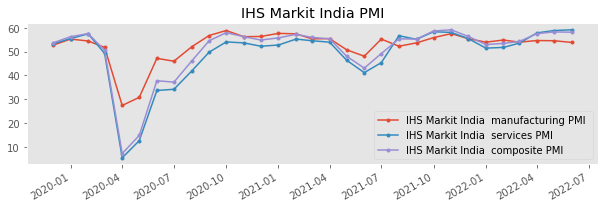

In [39]:
pmi.iloc[50:].plot(marker='.', figsize=(8.5,3), x_compat=True)
plt.xlabel("")
plt.title('IHS Markit India PMI')
plt.tight_layout()
plt.grid(visible=False)

plt.savefig(plot_output_dir+'\\pmicow.png', dpi=150)

plt.show()

# Vehicles

In [40]:
vehicle = pd.read_excel(excel_path, sheet_name="vehicles",index_col=0, parse_dates=True)

In [41]:
vehicle.rename(columns={
    "Transportation  vehicles ": "Commercial Vehicles",
    "Non-transportation  vehicles ": "Passenger Vehicles"
}, inplace=True)

In [42]:
vehicle = vehicle.iloc[-30:]
vehicle.index = pd.to_datetime(vehicle.index).to_period('M')

In [43]:
vehicle = vehicle/100000

In [44]:
vehicle.tail()

,Total vehicles,Commercial Vehicles,Passenger Vehicles
2022-02,13.80570,1.12681,12.67889
2022-03,16.28490,1.39037,14.89453
2022-04,16.35382,1.32521,15.02861
2022-05,NaN,1.21114,15.33542
2022-06,NaN,1.28554,14.29979


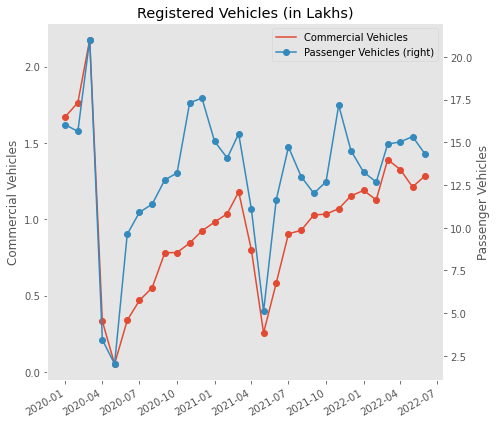

In [45]:
ax=vehicle.plot(kind='line', y='Commercial Vehicles', figsize=(7,6), marker='o', x_compat=True)

ax2=vehicle.plot(kind='line', y='Passenger Vehicles', secondary_y=True, ax=ax, marker='o', x_compat=True)

ax.set_ylabel('Commercial Vehicles')
ax2.set_ylabel('Passenger Vehicles')

plt.title('Registered Vehicles (in Lakhs)')

plt.grid(visible=False)

plt.tight_layout()
plt.savefig(plot_output_dir+'\\registered_vehicles.png', dpi=300, bbox_inches='tight')

plt.show()

# FasTag

In [46]:
fastag = pd.read_excel(excel_path, sheet_name="fastag",index_col=0, parse_dates=True)

C:\Users\ADVAIT~1\AppData\Local\Temp/ipykernel_4580/1931119964.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  fastag['Amount (In Cr)']['2020-01-01':].iloc[0:].plot(kind='line', alpha=0.8, marker='o', figsize=(7,6), x_compat=True)


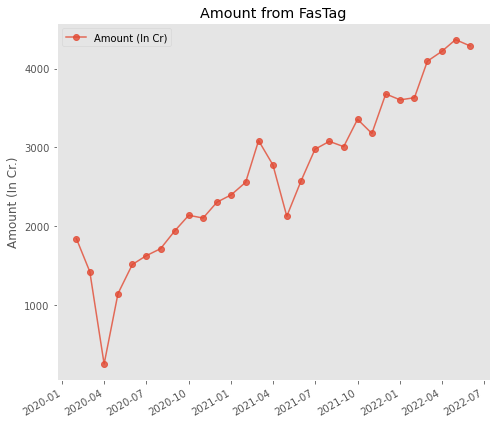

In [47]:
fastag['Amount (In Cr)']['2020-01-01':].iloc[0:].plot(kind='line', alpha=0.8, marker='o', figsize=(7,6), x_compat=True)
plt.legend()
plt.xlabel('')
plt.ylabel('Amount (In Cr.)')
plt.grid(visible=False)
plt.title('Amount from FasTag')
plt.tight_layout()

plt.savefig(plot_output_dir+'\\amt fastag 2020.png', dpi=150, bbox_inches='tight')

plt.show()



In [48]:
fastag.head()

,No. of Banks Live on NETC,Tag Issuance (In Nos.),Volume (In Mn),Amount (In Cr)
Month,,,,
2022-06-01,NaN,NaN,NaN,4290.00
2022-05-01,36.0,52856885,285.37,4369.36
2022-04-01,36.0,51189695,265.98,4218.89
2022-03-01,36.0,49585840,270.41,4095.30
2022-02-01,NaN,47774655,243.64,3631.22


# Fuel Consumption

In [49]:
fuel = pd.read_excel(excel_path, sheet_name="fuel-cons",index_col=0, parse_dates=True)

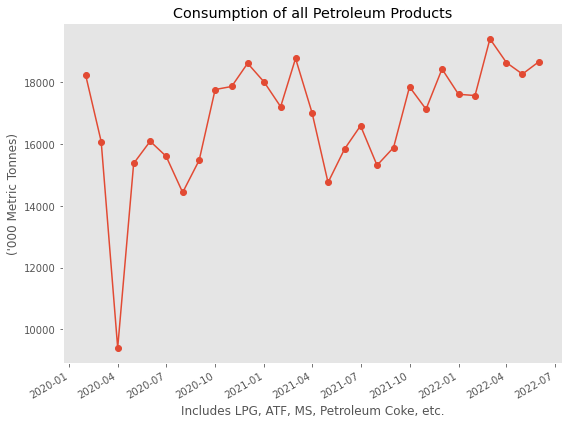

In [50]:
fuel['TOTAL']['2020-01-02':].iloc[0:].plot(marker='o', figsize=(8,6), x_compat=True)
plt.xlabel('Includes LPG, ATF, MS, Petroleum Coke, etc.')
plt.ylabel("('000 Metric Tonnes)")
plt.title('Consumption of all Petroleum Products')
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+'\\petrol_consump', dpi=300, bbox_inches='tight')


In [51]:
fuel[::-1].pct_change()*100

,TOTAL
Date,
2022-06-01,NaN
2022-05-01,-2.155107
2022-04-01,2.032885
2022-03-01,4.130901
2022-02-01,-9.460944
2022-01-01,0.229715
2021-12-01,4.655388
2021-11-01,-7.068460
2021-10-01,4.220419


# Monthly

In [52]:
monthly = pd.read_excel(excel_path, sheet_name="monthly-indicators",index_col=0, parse_dates=True)

In [53]:
monthly.tail()

,Finished Steel Production,Finished Steel Consumption,Railways: freight traffic,Imports,Exports,Port Volume,Tax Receipts,Central Government Expenditure,Service Receipts,Service Payments
2022-02-01,9706,9200,119690,54977.6,33790.1,58550.0,1766130.0,3344910.0,21250,12954
2022-03-01,10744,9848,139240,59090.1,40391.7,69508.0,4334980.0,6502960.0,26882,15328
2022-04-01,9350,9049,122200,58264.7,38193.1,64960.0,2322660.0,2748290.0,22594,14052
2022-05-01,9729,9445,131700,60619.3,37289.6,65883.0,1712560.0,3109450.0,23280,14430
2022-06-01,9710,9258,125500,66315.8,40136.1,NaN,NaN,NaN,24770,16110


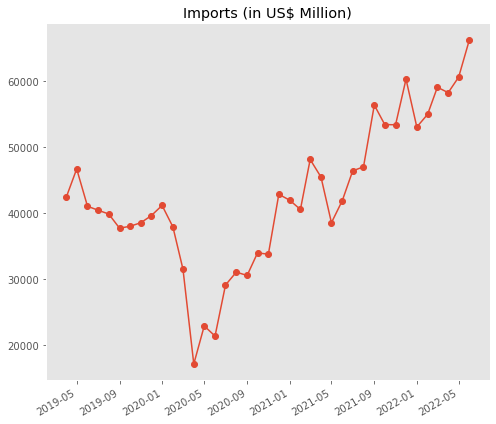

In [54]:
monthly['Imports'].iloc[:].plot(marker='o', figsize=(7,6), x_compat=True)
# plt.ylabel('YoY Change in %')
plt.title('Imports (in US$ Million)')
plt.grid(visible=False)
plt.tight_layout()

plt.savefig(plot_output_dir+'\\imports.png', dpi=300, bbox_inches='tight')




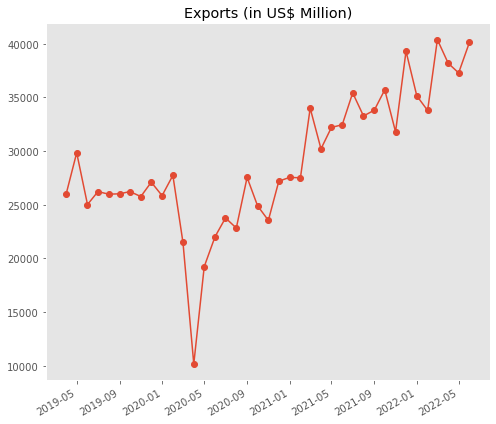

In [55]:
monthly['Exports'].plot(marker='o', figsize=(7,6), x_compat=True)
# plt.ylabel('YoY Change in %')
plt.title('Exports (in US$ Million)')
plt.grid(b=False)
plt.tight_layout()

plt.savefig(plot_output_dir+'\\exports.png', dpi=300, bbox_inches='tight')

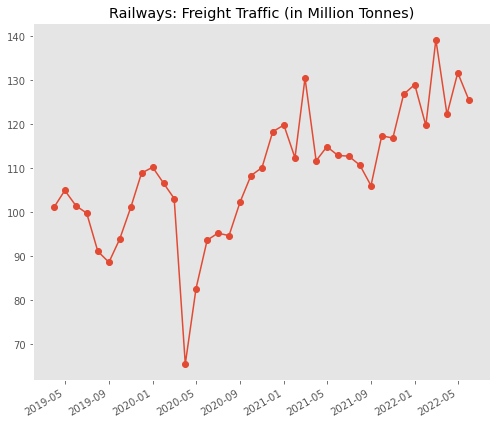

In [56]:

(monthly['Railways: freight traffic']/1000).plot(marker='o', figsize=(7,6), x_compat=True)
# plt.ylabel('YoY Change in %')
plt.title('Railways: Freight Traffic (in Million Tonnes)')
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+'\\rail.png', dpi=300, bbox_inches='tight')


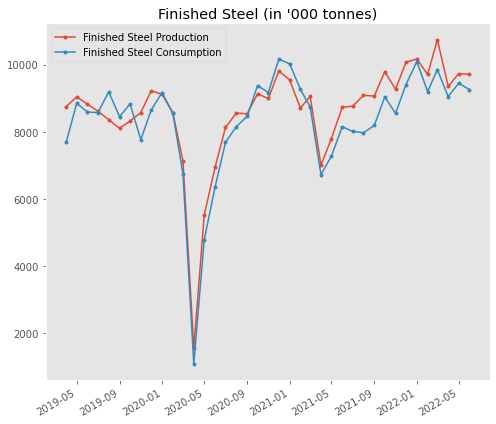

In [57]:
monthly.iloc[:,[0,1]].plot(marker='.', figsize=(7,6), x_compat=True)
# plt.ylabel('YoY Change in %')
plt.title("Finished Steel (in '000 tonnes)")
plt.grid(visible=False)
# plt.legend()
plt.tight_layout()
plt.savefig(plot_output_dir+'\\steel.png', dpi=300, bbox_inches='tight')




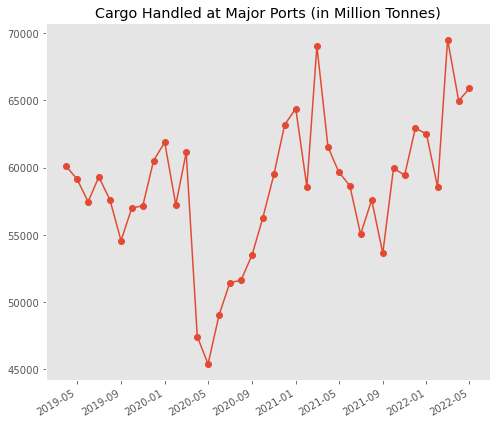

In [74]:

monthly['Port Volume'].iloc[:].plot(marker='o', figsize=(7,6), x_compat=True)
# plt.ylabel('YoY Change in %')
plt.title('Cargo Handled at Major Ports (in Million Tonnes)')
plt.grid(visible=False)
# plt.legend()
plt.tight_layout()
plt.savefig(plot_output_dir+'\\cargo.png', dpi=300, bbox_inches='tight')



In [75]:
monthly['Port Volume']

2019-04-01    60087
2019-05-01    59151
2019-06-01    57459
2019-07-01    59300
2019-08-01    57603
2019-09-01    54567
2019-10-01    56978
2019-11-01    57172
2019-12-01    60520
2020-01-01    61872
2020-02-01    57233
2020-03-01    61120
2020-04-01    47432
2020-05-01    45398
2020-06-01    49052
2020-07-01    51454
2020-08-01    51611
2020-09-01    53511
2020-10-01    56258
2020-11-01    59491
2020-12-01    63175
2021-01-01    64383
2021-02-01    58566
2021-03-01    69030
2021-04-01    61528
2021-05-01    59675
2021-06-01    58646
2021-07-01    55038
2021-08-01    57589
2021-09-01    53628
2021-10-01    59956
2021-11-01    59428
2021-12-01    62930
2022-01-01    62492
2022-02-01    58550
2022-03-01    69508
2022-04-01    64960
2022-05-01    65883
Name: Port Volume, dtype: int64

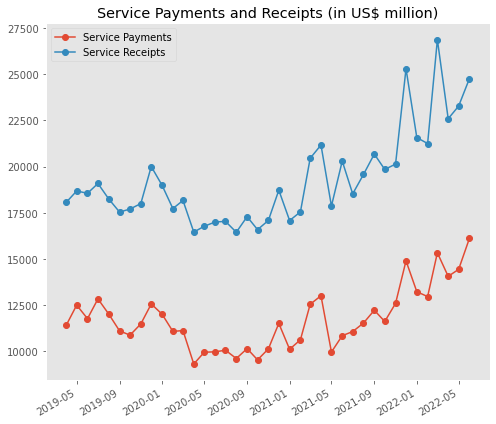

In [58]:
monthly[['Service Payments', 'Service Receipts']].iloc[:].plot(marker='o', figsize=(7,6), x_compat=True)

plt.title('Service Payments and Receipts (in US$ million)')
plt.grid(visible=False)
# plt.legend()
plt.tight_layout()
plt.savefig(plot_output_dir+'\\service.png', dpi=300, bbox_inches='tight')




In [59]:
monthly.tail()

,Finished Steel Production,Finished Steel Consumption,Railways: freight traffic,Imports,Exports,Port Volume,Tax Receipts,Central Government Expenditure,Service Receipts,Service Payments
2022-02-01,9706,9200,119690,54977.6,33790.1,58550.0,1766130.0,3344910.0,21250,12954
2022-03-01,10744,9848,139240,59090.1,40391.7,69508.0,4334980.0,6502960.0,26882,15328
2022-04-01,9350,9049,122200,58264.7,38193.1,64960.0,2322660.0,2748290.0,22594,14052
2022-05-01,9729,9445,131700,60619.3,37289.6,65883.0,1712560.0,3109450.0,23280,14430
2022-06-01,9710,9258,125500,66315.8,40136.1,NaN,NaN,NaN,24770,16110


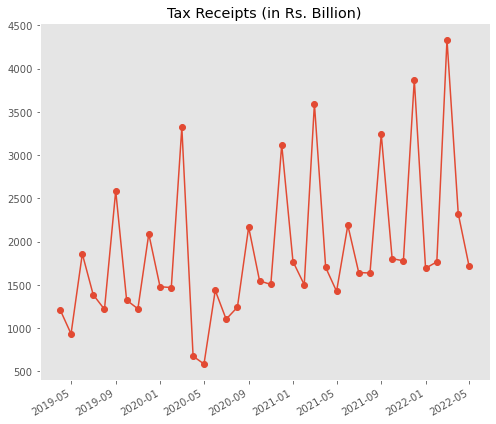

In [60]:
(monthly['Tax Receipts']/1000).iloc[:].plot(marker='o', figsize=(7,6), x_compat=True)

# plt.ylabel('YoY Change (in %)')
plt.title('Tax Receipts (in Rs. Billion)')
plt.grid(visible=False)
# plt.legend()
plt.tight_layout()
plt.savefig(plot_output_dir+'\\taxreceipt.png', dpi=300, bbox_inches='tight')




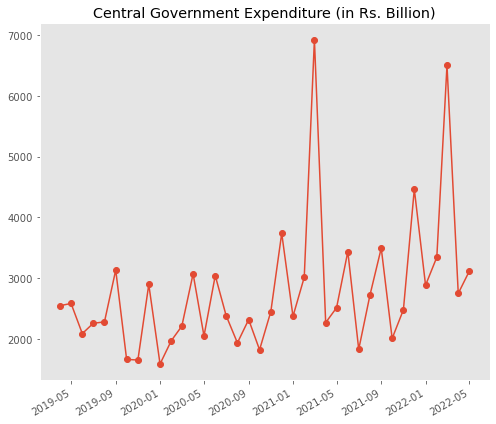

In [78]:
(monthly['Central Government Expenditure']/1000).iloc[:].plot(marker='o', figsize=(7,6), x_compat=True)

# plt.ylabel('YoY Change (in %)')
plt.title('Central Government Expenditure (in Rs. Billion)')
plt.grid(visible=False)
# plt.legend()
plt.tight_layout()
plt.savefig(plot_output_dir+'\\govtexpenditure.png', dpi=300, bbox_inches='tight')




# Money

In [61]:
money = pd.read_excel(excel_path, sheet_name="money",index_col=0, parse_dates=True)

In [62]:
money

,M3,public
Date,,
2019-09-13,10.08,12.73
2019-09-27,9.65,13.36
2019-10-11,10.01,13.54
2019-10-25,10.60,15.29
2019-11-08,9.93,12.24
...,...,...
2022-05-06,9.29,10.01
2022-05-20,8.78,8.97
2022-06-03,8.58,7.60


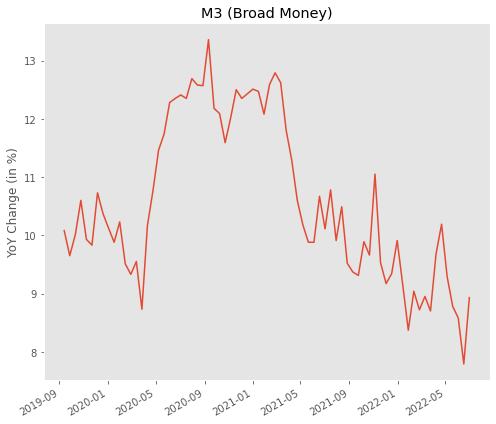

In [63]:
money['M3'].plot(figsize=(7,6), x_compat=True)
plt.xlabel('')
plt.ylabel('YoY Change (in %)')
plt.grid(visible=False)
plt.title('M3 (Broad Money)')
plt.tight_layout()
plt.savefig(plot_output_dir+'\\m3.png', dpi=150, bbox_inches='tight')

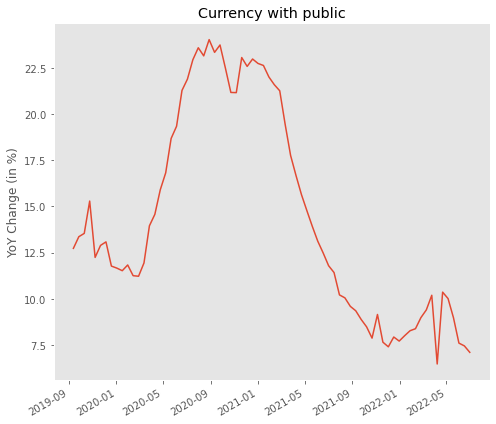

In [64]:
money['public'].plot(figsize=(7,6), x_compat=True)

plt.xlabel('')
plt.ylabel('YoY Change (in %)')
plt.grid(visible=False)
plt.title('Currency with public')
plt.tight_layout()
plt.savefig(plot_output_dir+'\\public_currency.png', dpi=300, bbox_inches='tight')



# Forex

In [65]:
forex = pd.read_excel(excel_path, sheet_name="forex", index_col=0, parse_dates=True)

In [66]:
forex.tail()

,Forex Reserves
Date,
2022-06-10,596458.0
2022-06-17,590588.0
2022-06-24,593323.0
2022-07-01,588314.0
2022-07-08,580252.0


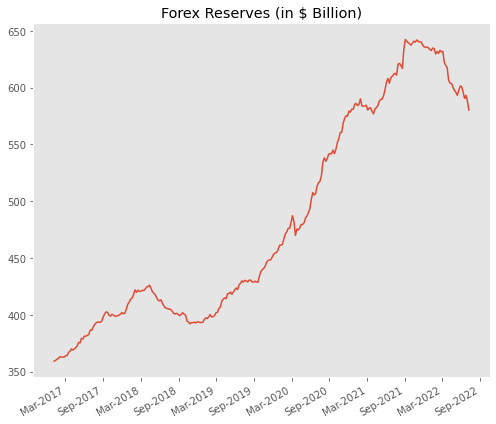

In [67]:
ax=(forex/1000)['Forex Reserves'].plot(figsize=(7,6), x_compat=True)
# plt.ylabel('in Billions of Rs.')

ax.get_yaxis().set_major_formatter(
    mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
    
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.title('Forex Reserves (in $ Billion)')
plt.xlabel("")
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+'\\forex.png', dpi=300, bbox_inches='tight')



In [68]:
bank = pd.read_excel(excel_path, sheet_name='banking', index_col=0, parse_dates=True)

In [69]:
bank

,Deposits,Credit
Date,,
2018-07-06,8.36,12.74
2018-07-20,8.15,12.40
2018-08-03,8.16,12.61
2018-08-17,8.31,12.92
2018-08-31,8.89,13.38
...,...,...
2022-05-06,9.72,10.77
2022-05-20,9.28,11.14
2022-06-03,9.27,11.96


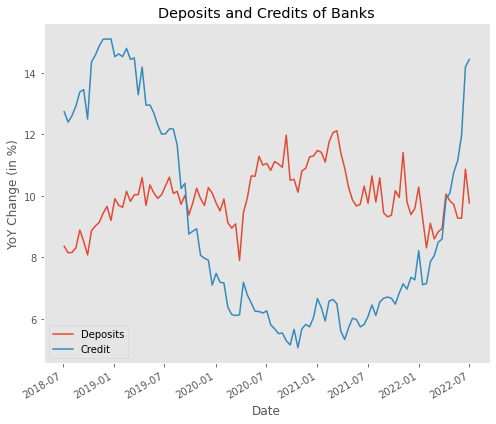

In [70]:
bank.plot(figsize=(7,6), x_compat=True)

plt.ylabel('YoY Change (in %)')
plt.title('Deposits and Credits of Banks')
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+'\\banks.png', dpi=300, bbox_inches='tight')


# COVID

## Active - MOHFW

In [71]:
active = pd.read_excel(excel_path, sheet_name='covid-active', index_col=0, usecols=[0,1])

In [72]:
active['Active Cases Total']

Name of State / UT
Andaman and Nicobar Islands                    48
Andhra Pradesh                               2241
Arunachal Pradesh                             222
Assam                                        3434
Bihar                                        2641
Chandigarh                                    461
Chhattisgarh                                 2389
Dadra and Nagar Haveli and Daman and Diu       11
Delhi                                        2010
Goa                                           786
Gujarat                                      4482
Haryana                                      1892
Himachal Pradesh                             2043
Jammu and Kashmir                             856
Jharkhand                                    1040
Karnataka                                    6702
Kerala                                      24953
Ladakh                                         61
Lakshadweep                                     0
Madhya Pradesh                 

In [73]:
print(active.sum()[0])

140760


In [74]:
active.loc["India"] = active.sum()[0]

In [75]:
active = active.sort_values(by='Active Cases Total', ascending=False)
#active = active/1000
active.head()

,Active Cases Total
Name of State / UT,
India,140760
West Bengal,30043
Kerala,24953
Tamil Nadu,17487
Maharashtra,16000


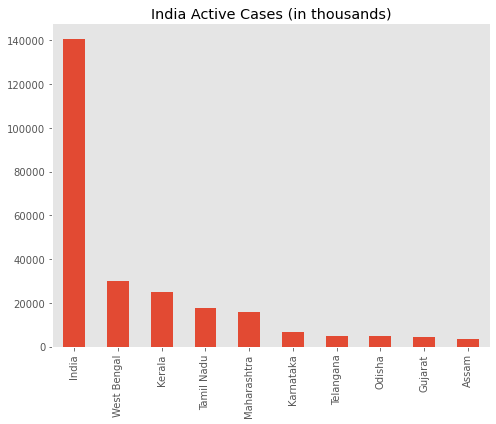

In [77]:
active[:10].plot(kind='bar', figsize=(7,6), legend=False)

plt.xlabel("")
plt.title("India Active Cases (in thousands)")
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+"\\state.png",dpi=300)



# Vaccination - COWIN

In [78]:
vacc = pd.read_excel(excel_path, sheet_name='cowin-state', index_col=0)

In [79]:
vacc['Partially Vaccinated'] = vacc['partial_vaccinated']/vacc['Population']
vacc['Fully Vaccinated'] = vacc['totally_vaccinated']/vacc['Population']
vacc['Vaccinated with precaution dose'] = vacc['Precaution Dose']/vacc['Population']

In [80]:
vacc

,Population,partial_vaccinated,totally_vaccinated,Precaution Dose,Partially Vaccinated,Fully Vaccinated,Vaccinated with precaution dose
State,,,,,,,
A & N Islands,417036,344041,342365,31956,0.824967,0.820948,0.076626
Andhra Pradesh,53903393,44639284,47518007,5671658,0.828135,0.881540,0.105219
Arunachal Pradesh,1570458,940234,784304,43161,0.598701,0.499411,0.027483
Assam,35607039,24589714,21548525,1021800,0.690586,0.605176,0.028697
Bihar,124799926,71748523,62985994,5111930,0.574908,0.504696,0.040961
Chandigarh,1158473,1180111,970807,57723,1.018678,0.838006,0.049827
Chhattisgarh,29436231,20905490,19142468,1092127,0.710196,0.650303,0.037101
Delhi,18710922,18153848,15356981,1923255,0.970227,0.820750,0.102788
Goa,1586250,1436160,1286619,74192,0.905381,0.811107,0.046772


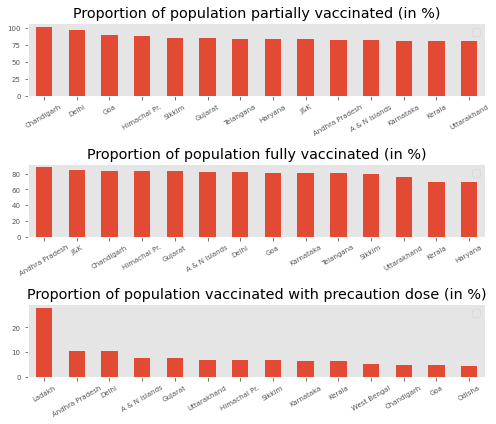

In [81]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7,6))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

ax = ((vacc['Partially Vaccinated'].sort_values(ascending=False).iloc[:14])*100).plot(kind='bar', ax=axes[0], rot=30)
ax.set_title("Proportion of population partially vaccinated (in %)")
plt.tight_layout()
ax.legend("")
ax.grid(False)
ax.tick_params(axis='both', which='major', labelsize=7)
ax.tick_params(axis='both', which='minor', labelsize=7)
# plt.legend(bbox_to_anchor=(1.05,1))
ax.set_xlabel("")


ax2 = ((vacc['Fully Vaccinated'].sort_values(ascending=False).iloc[:14])*100).plot(kind='bar', ax=axes[1], rot=30)
ax2.set_title("Proportion of population fully vaccinated (in %)")
plt.tight_layout()
ax2.legend("")
ax2.grid(False)
ax2.tick_params(axis='both', which='major', labelsize=7)
ax2.tick_params(axis='both', which='minor', labelsize=7)
# plt.legend(bbox_to_anchor=(1.05,1))
ax2.set_xlabel("")

ax3 = ((vacc['Vaccinated with precaution dose'].sort_values(ascending=False).iloc[0:14])*100).plot(kind='bar', ax=axes[2], rot=30)
ax3.set_title("Proportion of population vaccinated with precaution dose (in %)")
plt.tight_layout()
ax3.legend("")
ax3.grid(False)
ax3.tick_params(axis='both', which='major', labelsize=7)
ax3.tick_params(axis='both', which='minor', labelsize=7)
# plt.legend(bbox_to_anchor=(1.05,1))
ax3.set_xlabel("")

plt.tight_layout()

plt.savefig(plot_output_dir+"\\vaccines_india.png", dpi=300)




## age wise PIB

In [82]:
age = pd.read_excel(excel_path, sheet_name="age-pib", index_col=0, usecols=[0,1,2,3])

In [83]:
age = age/10000000

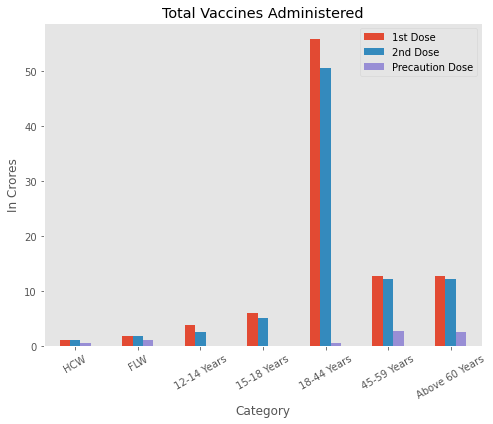

In [84]:
age.plot(kind='bar', rot=0, figsize=(7,6))

# plt.xlabel("\n *45-60 year old with co-morbidities")

plt.ylabel("In Crores")
plt.xticks(rotation=30)
plt.title("Total Vaccines Administered")
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+'\\age_pib.png', dpi=300)
